# STANDALONE STUDY
## **DOUBLE FOURBAR MECHANISM**
-----------------

### **IMPORTANT NOTES**
#### **COLAB Machine Setup**
If starting a new Colab session, Please open the [colab_setup.ipynb](https://colab.research.google.com/github/khaledghobashy/smbd/blob/master/examples/notebooks/colab_setup.ipynb) and follow the instructions there.
You can have various open notebook on the same Colab session. The Colab session linked to your Google account expires in 12 hours, and so any data saved on that remote machine will be lost.</br>
When you run the first cell, Colab will prompt a warning that *"This notebook was not authored by Google."* and that it is loaded from GitHub. Un-check the **Reset all runtimes before running** then press **RUN ANYWAY**.

#### **Package Path.**
*This step is temporary unitll the package can be installed via conda and/or pip*
- **Colab**. </br>
For a Cloab session, the ```pkg_path``` variable is ```'/content/smbd'```. This should be used if you are running the notebook on Colab.
- **Local Machine**. </br>
The ```pkg_path``` variable is where you have the repository on your machine. You should change it to where you cloned the repository on your machine.

#### **Projects Directory**
- **Colab**.</br>
The ```projects_dir``` variable should not be changed.
- **Local Machine**. </br>
The ```projects_dir``` should be changed to match your desired directory where you store your projects.

--------------------------------------------------------------

### Colab Session
*Run if in a Colab Session Only!*

In [ ]:
import sys
project_dir = '/content/projects/%s'%project_name
pkg_path = '/content/smbd'
sys.path.append(pkg_path)

### Local Session
*Run if on your Local Machine!*</br>
*Uncomment the code below and change the variables as illustrated in the notes!*

In [1]:
#import sys
#pkg_path = '/path/to/smbd'
#sys.path.append(pkg_path)

project_dir = ''

---------------------------------------------------------------
---------------------------------------------------------------

In [2]:
from smbd.systems import standalone_project, standalone_topology, configuration

In [3]:
project = standalone_project(project_dir)
project.create()

---------------------------------------------------------------
---------------------------------------------------------------

## **SYSTEM DESCRIPTION**
-------------------------

### **Important Note**
The tool uses [euler-parameters](https://en.wikibooks.org/wiki/Multibody_Mechanics/Euler_Parameters) -which is a 4D unit quaternion- to represents bodies orientation in space. This makes the generalized coordinates used to fully define a body in space to be **7,** instead of **6**, it also adds an algebraic equation to the constraints that ensures the unity/normalization of the body quaternion. This is an important remark as the calculations of the degrees-of-freedom depends on it.

### **Summary**
The figure shows a double four-bar mechanism, which is simply an extended version of a simple four-bar. The model is used in benchmarks studies to study the singular configurations of mechanisms. When the  mechanism reaches the horizontal position, the number of degrees of freedom instantaneously increases  from 1 to 3. Therefore, this benchmark problem is proposed as an example of multibody system going through singular positions.

![double_fourbar](double_fourbar.png)

### **Topology Layout**
The mechanism consists of 5 Bodies + 1 Ground. Therefore, total system coordinates -including the ground- is $$n=n_b\times7 = 6\times7 = 42$$ 
where $n_b$ is the total number of bodies. The list of bodies is given below:
- Crank ($l_1$).
- Crank ($l_3$).
- Crank ($l_5$).
- Coupler ($l_2$).
- Coupler ($l_4$).

The system connectivity is as follows:
- Cranks $l_1$, $l_3$ and $l_5$ are connected to the ground by revolute joints, resulting in constraint equations $3 \times n_{c,rev} = 3 \times 5 = 15$
- Each coupler is connected to the adjacent cranks by two spherical joints at each end, resulting in constraint equations $4 \times n_{c,sph} = 4 \times 3 = 12$
- System Degrees of Freedom is then given by $42 - ((1\times6) + 15 + 12 + 6) = 42 - 39 = 3$, where the extra 2 DOF arise from the un-constrained spin of each coupler due to the use of spherical joints at each end.


---------------------------------------------------------------
---------------------------------------------------------------

## **SYMBOLIC TOPOLOGY**
------------------------

In this section, we create the symbolic topology that captures the topological layout that we just discussed.</br>
Defining the topology is very simple. We start by creating an instance of the ```standalone_topology``` class that represents our symbolic model. Then we start adding the components we discussed earlier, starting by the bodies, then the joints, actuators and forces, and thats it.</br>
These components will be represented symbolically, and therefore there is no need for any numerical inputs at this step.

The system is stored in a form of a network graph that stores all the data needed for the assemblage of the system equations later. But even before the assemblage process, we can gain helpful insights about our system as well be shown.


In [4]:
project_name = 'double_fourbar'

In [5]:
sym_model = standalone_topology(project_name)

### Adding Bodies

In [6]:
# Adding Bodies
sym_model.add_body('l1')
sym_model.add_body('l2')
sym_model.add_body('l3')

sym_model.add_body('l4')
sym_model.add_body('l5')

### Adding Joints

In [7]:
# Adding Joints
sym_model.add_joint.revolute('a', 'ground', 'rbs_l1')
sym_model.add_joint.spherical('b', 'rbs_l1', 'rbs_l2')
sym_model.add_joint.spherical('c', 'rbs_l2', 'rbs_l3')
sym_model.add_joint.revolute('d', 'rbs_l3', 'ground')

sym_model.add_joint.spherical('e', 'rbs_l3', 'rbs_l4')
sym_model.add_joint.spherical('f', 'rbs_l4', 'rbs_l5')
sym_model.add_joint.revolute('g', 'rbs_l5', 'ground')

### Adding Actuators

In [8]:
# No actuators needed for the study

### Adding Forces

In [9]:
sym_model.add_force.torque('torque', 'rbs_l1')

### **SYMBOLIC CHARACTERISTICS**

#### Topology Graph
Visualizing the connectivity of the system as a network graph, where the nodes represent the bodies, and the edges represent the joints, forces and/or actuators between the bodies.

/home/khaledghobashy/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


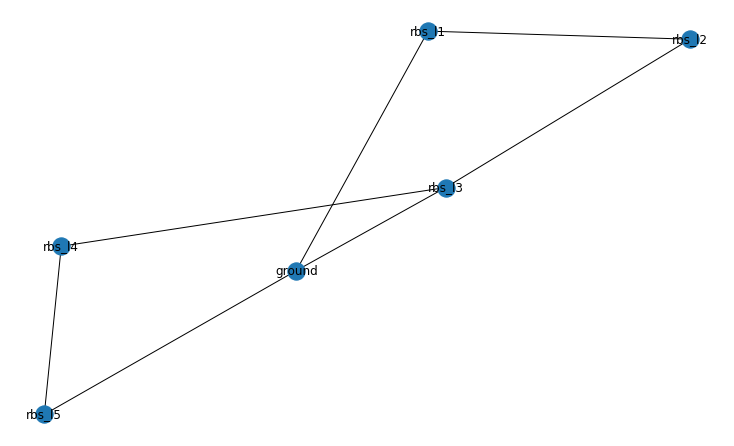

In [10]:
sym_model.topology.draw_constraints_topology()

In [11]:
sym_model.topology.n, sym_model.topology.nc

(42, 39)

### **ASSEMBLING**

This is the last step of the symbolic model building process, where the system starts the assemblage process of the governing equations, which will be used then in the code generation for the numerical simulation, and also can be used for further symbolic manipulations.</br>

*Note: The equations' notations will be discussed in a separate documentation file.*

In [12]:
sym_model.assemble()

#### Checking the System Equations

In [13]:
sym_model.topology.pos_equations

Matrix([
[ A({P_{ground}})*{\bar{u}^{ground}_{jcs_a}} - A({P_{rbs_l1}})*{\bar{u}^{rbs_l1}_{jcs_a}} + {R_{ground}} - {R_{rbs_l1}}],
[                           Mbar_ground_jcs_a[:,(0, 1)].T*A({P_{ground}}).T*A({P_{rbs_l1}})*Mbar_rbs_l1_jcs_a[:,(2, 3)]],
[                           Mbar_ground_jcs_a[:,(1, 2)].T*A({P_{ground}}).T*A({P_{rbs_l1}})*Mbar_rbs_l1_jcs_a[:,(2, 3)]],
[ A({P_{rbs_l1}})*{\bar{u}^{rbs_l1}_{jcs_b}} - A({P_{rbs_l2}})*{\bar{u}^{rbs_l2}_{jcs_b}} + {R_{rbs_l1}} - {R_{rbs_l2}}],
[ A({P_{rbs_l2}})*{\bar{u}^{rbs_l2}_{jcs_c}} - A({P_{rbs_l3}})*{\bar{u}^{rbs_l3}_{jcs_c}} + {R_{rbs_l2}} - {R_{rbs_l3}}],
[-A({P_{ground}})*{\bar{u}^{ground}_{jcs_d}} + A({P_{rbs_l3}})*{\bar{u}^{rbs_l3}_{jcs_d}} - {R_{ground}} + {R_{rbs_l3}}],
[                           Mbar_rbs_l3_jcs_d[:,(0, 1)].T*A({P_{rbs_l3}}).T*A({P_{ground}})*Mbar_ground_jcs_d[:,(2, 3)]],
[                           Mbar_rbs_l3_jcs_d[:,(1, 2)].T*A({P_{rbs_l3}}).T*A({P_{ground}})*Mbar_ground_jcs_d[:,(2, 3)]],
[ A({P_{rbs_l3}

---------------------------------------------------------------
---------------------------------------------------------------

## **SYSTEM CONFIGURATION**
---------------------------

In this step we define a symbolic configuration of our symbolic topology. As you may have noticed in the symbolic topology building step, we only cared about the **_topology_**, thats is the system bodies and their connectivity, and we did not care explicitly with how these components are configured in space.</br>

In order to create a valid numerical simulation session, we have to provide the system with its numerical configuration needed, for example, the joints' locations and orientations. The symbolic topology in its raw form will require you to manually enter all these numerical arguments, which can be cumbersome even for smaller systems. This can be checked by checking the configuration inputs of the symbolic configuration as ```sym_config.config.input_nodes```

Here we start by stating the symbolic inputs we wish to use instead of the default inputs set, and then we define the relation between these newly defined arguments and the original ones. The details of this process will be provided in the documentation.

In [14]:
# Symbolic configuration name.
config_name = '%s_cfg'%project_name

# Symbolic configuration instance.
sym_config = configuration(config_name, sym_model)

In [15]:
sym_config.config.input_nodes

['ax1_jcs_a',
 'pt1_jcs_a',
 'UF_fas_torque',
 'ax1_fas_torque',
 'ax1_jcs_b',
 'pt1_jcs_b',
 'ax1_jcs_c',
 'pt1_jcs_c',
 'ax1_jcs_d',
 'pt1_jcs_d',
 'ax1_jcs_e',
 'pt1_jcs_e',
 'ax1_jcs_f',
 'pt1_jcs_f',
 'ax1_jcs_g',
 'pt1_jcs_g',
 'R_ground',
 'P_ground',
 'Rd_ground',
 'Pd_ground',
 'Rdd_ground',
 'Pdd_ground',
 'R_rbs_l1',
 'P_rbs_l1',
 'Rd_rbs_l1',
 'Pd_rbs_l1',
 'Rdd_rbs_l1',
 'Pdd_rbs_l1',
 'm_rbs_l1',
 'Jbar_rbs_l1',
 'R_rbs_l2',
 'P_rbs_l2',
 'Rd_rbs_l2',
 'Pd_rbs_l2',
 'Rdd_rbs_l2',
 'Pdd_rbs_l2',
 'm_rbs_l2',
 'Jbar_rbs_l2',
 'R_rbs_l3',
 'P_rbs_l3',
 'Rd_rbs_l3',
 'Pd_rbs_l3',
 'Rdd_rbs_l3',
 'Pdd_rbs_l3',
 'm_rbs_l3',
 'Jbar_rbs_l3',
 'R_rbs_l4',
 'P_rbs_l4',
 'Rd_rbs_l4',
 'Pd_rbs_l4',
 'Rdd_rbs_l4',
 'Pdd_rbs_l4',
 'm_rbs_l4',
 'Jbar_rbs_l4',
 'R_rbs_l5',
 'P_rbs_l5',
 'Rd_rbs_l5',
 'Pd_rbs_l5',
 'Rdd_rbs_l5',
 'Pdd_rbs_l5',
 'm_rbs_l5',
 'Jbar_rbs_l5']

### CONFIGURATION INPUTS

In [16]:
# Adding the desired set of UserInputs
# ====================================

sym_config.add_point.UserInput('a')
sym_config.add_point.UserInput('b')
sym_config.add_point.UserInput('c')
sym_config.add_point.UserInput('d')

sym_config.add_point.UserInput('e')
sym_config.add_point.UserInput('f')
sym_config.add_point.UserInput('g')

sym_config.add_vector.UserInput('x')
sym_config.add_vector.UserInput('y')
sym_config.add_vector.UserInput('z')

### CONFIGURATION RELATIONS

In [17]:
# Defining Relations between original topology inputs
# and our desired UserInputs.
# ===================================================

# Joints Locations:
# ================
sym_config.add_relation.Equal_to('pt1_jcs_a', ('hps_a',))
sym_config.add_relation.Equal_to('pt1_jcs_b', ('hps_b',))
sym_config.add_relation.Equal_to('pt1_jcs_c', ('hps_c',))
sym_config.add_relation.Equal_to('pt1_jcs_d', ('hps_d',))

sym_config.add_relation.Equal_to('pt1_jcs_e', ('hps_e',))
sym_config.add_relation.Equal_to('pt1_jcs_f', ('hps_f',))
sym_config.add_relation.Equal_to('pt1_jcs_g', ('hps_g',))

# Joints Axes' Orientation:
# ========================

# Revolute Joints.
sym_config.add_relation.Equal_to('ax1_jcs_a', ('vcs_x',))
sym_config.add_relation.Equal_to('ax1_jcs_d', ('vcs_x',))
sym_config.add_relation.Equal_to('ax1_jcs_g', ('vcs_x',))

# Spherical Joints.
sym_config.add_relation.Equal_to('ax1_jcs_b', ('vcs_z',))
sym_config.add_relation.Equal_to('ax1_jcs_c', ('vcs_z',))
sym_config.add_relation.Equal_to('ax1_jcs_e', ('vcs_z',))
sym_config.add_relation.Equal_to('ax1_jcs_f', ('vcs_z',))

# Forces Axes' Orientation:
# ========================
# Input Torque Axis
sym_config.add_relation.Equal_to('ax1_fas_torque', ('vcs_x',))

### GEOMETRIES

Here we start defining basic geometric shapes that can represents the shapes of the bodies in our system. This serves two points:
- Visualization and Animation in blender.
- Evaluating the bodies inertia properties from these basic geometries instead of explicit definition.

In [18]:
# Creating Geometries
# ===================
sym_config.add_scalar.UserInput('links_ro')

sym_config.add_geometry.Cylinder_Geometry('l1', ('hps_a','hps_b','s_links_ro'))
sym_config.assign_geometry_to_body('rbs_l1', 'gms_l1')

sym_config.add_geometry.Cylinder_Geometry('l2', ('hps_b','hps_c','s_links_ro'))
sym_config.assign_geometry_to_body('rbs_l2', 'gms_l2')

sym_config.add_geometry.Cylinder_Geometry('l3', ('hps_c','hps_d','s_links_ro'))
sym_config.assign_geometry_to_body('rbs_l3', 'gms_l3')


sym_config.add_geometry.Cylinder_Geometry('l4', ('hps_e','hps_f','s_links_ro'))
sym_config.assign_geometry_to_body('rbs_l4', 'gms_l4')

sym_config.add_geometry.Cylinder_Geometry('l5', ('hps_f','hps_g','s_links_ro'))
sym_config.assign_geometry_to_body('rbs_l5', 'gms_l5')

### ASSEMBLING

In [19]:
sym_config.assemble()

---------------------------------------------------------------
---------------------------------------------------------------

## **CODE GENERATION**
----------------------

This step aims to create a valid code that can be used for numerical simulation. We will use the ***python code generators*** to create a valid numerical simulation environment in python.</br>
Theoretically, the symbolic environment is uncoupled from the simulation environment, which opens the door to create various numerical simulation environments that can be in any language.

### Generating Python Numerical Environment

In [21]:
from smbd.numenv.python.codegen import projects as py_numenv

In [22]:
py_project = py_numenv.standalone_project(parent_dir='')
py_project.create_dirs()

In [23]:
py_project.write_topology_code(sym_model.topology)
py_project.write_configuration_code(sym_config.config)

File full path : numenv/python/src/double_fourbar.py
File full path : numenv/python/src/double_fourbar_cfg.py


### Generating Blender Script

In [24]:
from smbd.utilities.blender import codegen

In [26]:
blender_code = codegen.script_generator(sym_config.config)
blender_code.write_code_file('numenv/')

---------------------------------------------------------------
---------------------------------------------------------------

## **PYTHON NUMERICAL SIMULATION**
---------------------------

The **numerical simulation** step is also a straight forward one. We start by importing helper libraries like **numpy** and **pandas**, then we import the ```multibody_system``` class and the ```simulation``` class that will be used to create a numerical system and a simulation instance respectively. And finally we import the generated code files from the previous step.

The steps then can be summarized as follows:
1. Create a numerical model instance by passing the generated topology code to the ```multibody_system``` class.
2. Make the configuration of that instance refers to the generated configuration code.
3. Setting the numerical data of the configuration.
4. Setting the **user-defined functions** that will be used for the actuators/forces.
5. Creating a **simulation instance**, set the desired time-sampling and run the simulation.
6. Plotting the results.

###  Imports

In [27]:
import numpy as np
from smbd.numenv.python.numerics.core.systems import multibody_system, simulation

In [28]:
from numenv.python.src import double_fourbar, double_fourbar_cfg

### Creating Numerical Model

In [29]:
num_model  = multibody_system(double_fourbar)
num_config = double_fourbar_cfg.configuration()
num_model.topology.config = num_config

### Setting Configuration Numerical Data

In [30]:
# Creating numerical inputs instance.
num_inputs = double_fourbar_cfg.inputs('base_config')


# Specifying the Numerical Configuration of the System.
# ====================================================

num_inputs.P_ground.flat[:] = 1, 0, 0, 0

num_inputs.hps_a.flat[:] = 0, 0, 0,
num_inputs.hps_b.flat[:] = 0, 0, 300,
num_inputs.hps_c.flat[:] = 0, 300, 300,
num_inputs.hps_d.flat[:] = 0, 300, 0,

num_inputs.hps_e = num_inputs.hps_c
num_inputs.hps_f.flat[:] = 0, 600, 300,
num_inputs.hps_g.flat[:] = 0, 600, 0,


num_inputs.vcs_x.flat[:]  = 1, 0, 0,
num_inputs.vcs_y.flat[:]  = 0, 1, 0,
num_inputs.vcs_z.flat[:]  = 0, 0, 1,


num_inputs.links_ro = 20

# Saving the numerical data to a new csv file
num_inputs.to_csv('config_inputs')

### Setting User Functions.

#### Actuators
Here we set the actuation functions of the system actuators.

In [ ]:
# No actuators exists.

#### Forces
Here we set the actuation functions of the system forces.

In [31]:
num_inputs.UF_fas_torque = lambda t : 500

### Assembling the numerical configuration.
Here, we pass the numerical inputs instance ```num_inputs``` to the ```assemble()``` method of the ```num_config``` instance of our model.

In [32]:
num_config.assemble(num_inputs)

### Creating Simulation Instance

A simulation instance takes in three arguments, the simulation ```name```, the numerical ```model``` and the simulation ```typ```. The simulation ```typ``` argument should be either *kds* for kinematically driven systems or *dds* for dynamically driven systems. For our case, the system is under constrained and is driven dynamically, and therefore we will set the ```typ``` as *dds*.

In [33]:
sim = simulation('sim', num_model, 'dds')
sim.set_time_array(10, 1e-2)
sim.solve()


Starting System Dynamic Analysis:
Estimated DOF : 3
Estimated Independent Coordinates : ['rbs_l4.e2', 'rbs_l2.e2', 'rbs_l4.y']

Running System Dynamic Analysis:
[=========================] 100%, (1999/1999) steps. ET = 69.87 (s)



We then save the simulation results if needed.

In [34]:
sim.save_results('results', 'driven')

results saved as driven.csv at /home/khaledghobashy/Documents/smbd/examples/standalone_models/notebooks/double_fourbar/results


### Evaluating System Reactions

Here we take the simulation a step further and evaluate the reactions resulted due the imposed constraints, either by joints or motion actuators.

In [35]:
sim.eval_reactions()


Evaluating System Constraints' Forces.
[=========================] 100%, (2000/2000) steps. ET = 6.405 (s)

### Plotting the Results

#### System Configuration Plots

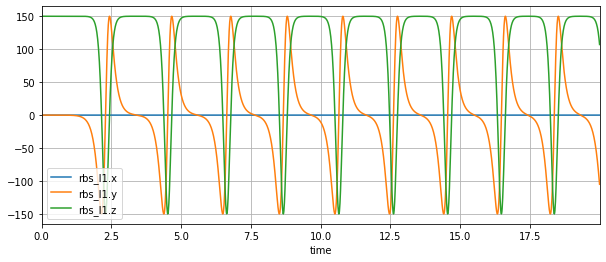

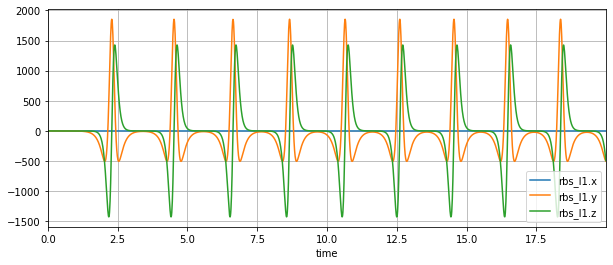

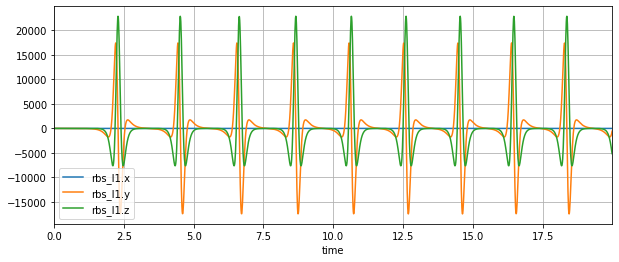

In [36]:
coordinates = ['rbs_l1.x', 'rbs_l1.y', 'rbs_l1.z']

sim.soln.pos_dataframe.plot(x='time', y=coordinates, grid=True, figsize=(10,4))

sim.soln.vel_dataframe.plot(x='time', y=coordinates, grid=True, figsize=(10,4))

sim.soln.acc_dataframe.plot(x='time', y=coordinates, grid=True, figsize=(10,4))

#### System Reactions Plots

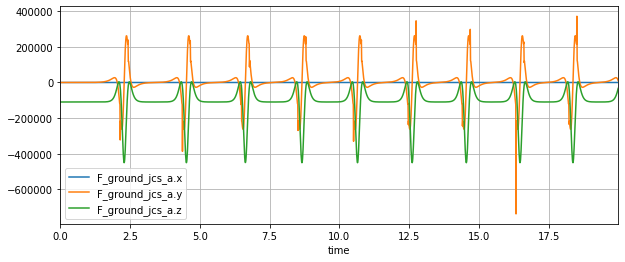

In [38]:
# Reaction Forces at joint 'a' imposed on the ground.
# ==================================================

coordinates = ['F_ground_jcs_a.x', 'F_ground_jcs_a.y', 'F_ground_jcs_a.z']
sim.soln.reactions_dataframe.plot(x='time', y=coordinates,
                                   grid=True, figsize=(10,4))


---------------------------------------------------------------
---------------------------------------------------------------